# <div style = "font-size : 42px; color : #000000 ; font-family : 'Oregon'; text-align : center; background-color : #dba514; border-radius: 5px 5px;"><strong>Bank Churn Prediction</strong></div>

## <div style = "font-size : 35px; color : #f9858b ; font-family : 'Calibri'; text-align : center; background-color : #bdfff6; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></div> 

<div align="center">
  <img align = 'center' src="https://user-images.githubusercontent.com/58620359/174948746-5dc3418a-8296-4cc8-9561-f8f12ca9a0a4.png" alt="Project Banner" width="1000"/>
</div>

## Introduction

## About

### Step 1:

In [3]:
# importing libraries

import os
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# style
plt.style.use('fivethirtyeight')
%matplotlib inline

### Step 2:

In [4]:
# Loading Dataset
data = pd.read_csv('data/bank_churn.csv')
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Step 3:

In [5]:
# Exploring data
data.shape

(165034, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [8]:
data.describe(include='O').T

,count,unique,top,freq
Surname,165034,2797,Hsia,2456
Geography,165034,3,France,94215
Gender,165034,2,Male,93150


<div style="font-size: 15px; color: #ff9900; font-family: 'Comic Sans MS';">

<h4 style="color: #bdfff6;">Insights:</h4>

- **Number of Entries**: The dataset consists of **165,034 entries**.

- **Columns**: There are **14 columns** capturing various aspects such as customer identification, demographics, financial attributes, and churn status.

- **Data Types**:
  - **int64**: 6 columns (e.g., `id`, `CustomerId`, `CreditScore`, `Tenure`, `NumOfProducts`, `Exited`).
  - **float64**: 5 columns (e.g., `Age`, `Balance`, `HasCrCard`, `IsActiveMember`, `EstimatedSalary`).
  - **object**: 3 columns (e.g., `Surname`, `Geography`, `Gender`).

- **Key Statistical Insights**:
  - **CreditScore**: Ranges from `350` to `850` with a mean around `656`, suggesting that most customers have a reasonably good credit score.
  - **Age**: Customer ages range from `18` to `92` years with an average of about `38` years, which can be important for demographic segmentation.
  - **Tenure**: Varies between `0` and `10` years, with a mean of roughly `5` years, indicating a moderate level of customer loyalty.
  - **Balance**: Ranges widely from `0` to nearly `250,898.09`, with an average around `55,478`, highlighting a diverse range of financial statuses among customers.
  - **Exited**: About **21.16%** of customers have exited, providing a baseline churn rate for further analysis.

- **Categorical Variables**:
  - **Surname**: Contains `2,797 unique` values, with "Hsia" being the most frequent surname (appearing `2,456` times).
  - **Geography**: Consists of `3 unique` entries. "France" is the most common, with `94,215` records, indicating a geographic concentration.
  - **Gender**: Has `2 unique` values. "Male" is the predominant category with `93,150` occurrences, which can be useful for gender-based analysis.


In [9]:
# Path for saving plots/figures of EDA
EDA_FIG_DIR = os.path.join('figures','EDA')
os.makedirs(EDA_FIG_DIR, exist_ok=True)

### Step 3: Distribution of Target Column

In [10]:
# Calculate percentages
percentage = data['Exited'].value_counts(normalize=True) * 100
labels = ["Not Exited", "Exited"]

# Create the pie chart using Plotly Express
fig = px.pie(
    values=percentage, 
    names=labels, 
    title="Churn Status",
    color_discrete_sequence=['#1188ff', '#e63a2a'],  # Set custom colors
    hole=0.3,  # Use 0 for a regular pie chart, >0 for a donut chart
    template="plotly_dark"  # Apply dark theme
)

fig.data[0].pull = [0, 0.1]  # Explode only the "Exited" slice

# Show the chart
fig.show()

# Save the chart as a PNG file
# image_path = os.path.join(EDA_FIG_DIR, 'churn_status.png')  # uncomment the following lines for saving the chart
# fig.write_image(image_path)

In [21]:
data["Exited"].replace({0:"No",1:"Yes"},inplace=True)

# Function for visualizing churn distribution for categorical features
def countplot(column):
    # Set the dark background style
    plt.style.use('dark_background')
    
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=data, hue="Exited",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(data[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()



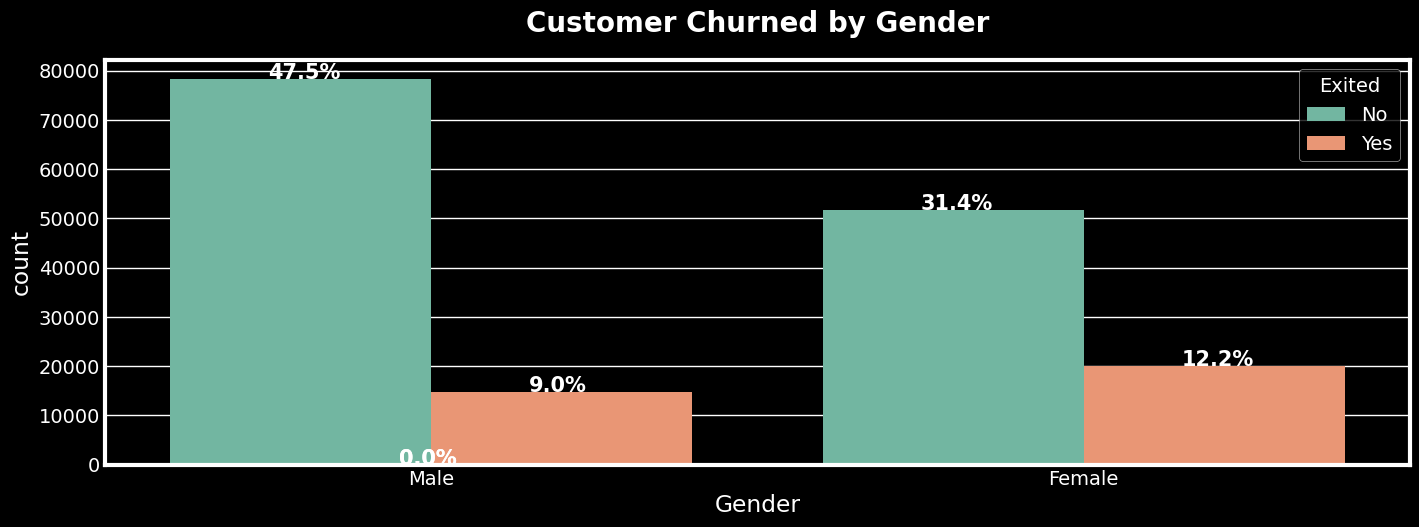

In [22]:
countplot('Gender')